P2: Bi-Objective linear optimization problem


In [1]:
import csv
import pandas
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *

Check if data for the objective functions and constraints exists, if not it creates them

In [2]:
files = os.listdir()
if ('constraints.csv' in files)==False or ('objectives.csv' in files)==False:
    with open("dataCreator.py", mode='r') as dataCreator:
        exec(dataCreator.read())

Read the values of the objective functions and constraints

In [8]:
obj_file = pandas.read_csv('objectives.csv')
c_file = pandas.read_csv('constraints.csv')
A = obj_file.columns.tolist()
B = sum(1 for line in obj_file)
print(obj_file)
print(c_file)
print(A)
print(B)

   x1  x2
0  -3  -8
1   5   4
   x1  x2    LB  UB
0   2   6  None  27
1   3   2  None  16
2   4   1  None  18
['x1', 'x2']
2


Create the model

In [26]:
model = ConcreteModel()
model.x = Var( A, within = NonNegativeReals)
model.c = ConstraintList()
for j in range(len(c_file)):
    model.c.add(expr = (None, sum(model.x[i]*c_file[i][j] for i in A), c_file['UB'][j]))

Define the objective function varing weights and solve each problem

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5]


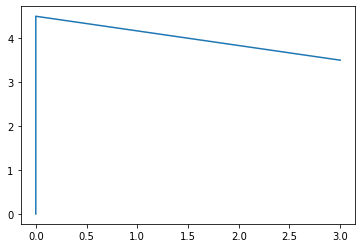

In [76]:
#model.del_component(model.obj)
x1 = []
x2 = []
for z in np.linspace(0,1,50):
    w=[z,1-z]
    model.obj = Objective(
        expr = sum(model.x[i]*obj_file[i][j]*w[j] for i in A for j in range(B)), sense = minimize)
    
    opt = SolverFactory('glpk')
    results = opt.solve(model)
    x1.append(value(model.x['x1']))
    x2.append(value(model.x['x2']))
    model.del_component(model.obj)
print(x1)
print(x2)
plt.plot(x1,x2)